In [1]:
# Load the the pre-processed data
bcw <- readRDS(file = './Data/bcw_processed.Rda')

In [3]:
# Dividing the data into training and test sets
m = nrow(bcw)
training_percentage = 0.7
test_percentage = 0.3

set.seed(7719)
ind <- sample(2, m, replace=TRUE, prob=c(training_percentage, test_percentage))

training_data <- bcw[ind==1,]
test_data <- bcw[ind==2,]

# Divide features and labels
training_features <- training_data[, 1:9]
test_features <- test_data[,1:9]
training_labels <- training_data[,10]
test_labels <- test_data[,10]

## Classification Tree

In [7]:
options(warn=-1)
library(party)

In [8]:
# Specify the target (class) and predictors
myFormula <- Class~ Clump.Thickness + Uniformity.of.Cell.Size + Uniformity.of.Cell.Shape + Marginal.Adhesion + Single.Ephithelial.Cell.Size + Bare.Nuclei + Bland.Chromatin + Normal.Nucleoli + Mitoses

In [20]:
# Generate classification tree
bcw_ctree <- ctree(myFormula, data=training_data)

In [21]:
# Get usefull predictors
getUsefulPredictors <- function(x){
    flatTree <- unlist(x@tree)
    pred <- unique(flatTree[grepl("*variableName", names(flatTree))])
}

getUsefulPredictors(bcw_ctree)

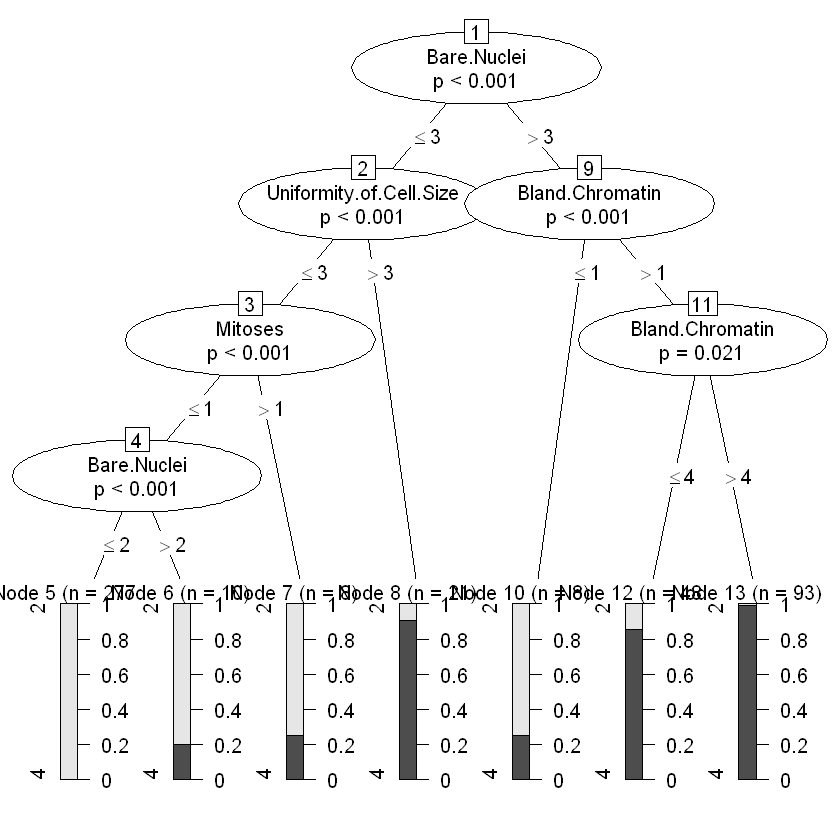

In [22]:
# Visualizing the tree
plot(bcw_ctree)

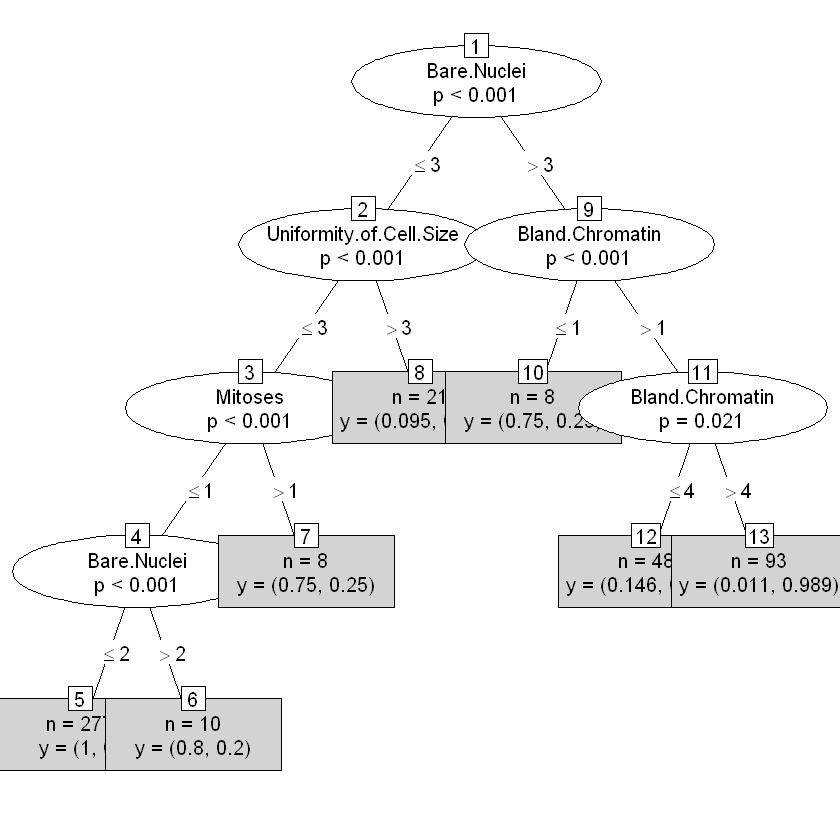

In [23]:
plot(bcw_ctree, type='simple')

In [25]:
#Predict test labels
ctree_pred<-predict(bcw_ctree, newdata=test_features, type="response")

#Creating Confusion matrix
cm_tree = as.matrix(table(Actual=test_labels, Predicted = ctree_pred)) 

n = sum(cm_tree) # number of instances
nc = nrow(cm_tree) # number of classes
diag = diag(cm_tree) # number of correctly classified instances per class
rowsums = apply(cm_tree, 1, sum) # number of instances per class
colsums = apply(cm_tree, 2, sum) #number of predictions per class

#Compute accuracy, precision, recall, and f1
accuracy = sum(diag)/n
precision = diag/colsums
recall = diag/rowsums
f1 = 2*precision*recall/(precision+recall)

table(ctree_pred, test_labels)

          test_labels
ctree_pred   2   4
         2 130   3
         4   7  78

In [26]:
result<-data.frame(precision,recall,f1)
result

,precision,recall,f1
2,0.9774436,0.9489051,0.962963
4,0.9176471,0.9629630,0.939759


## KNN

In [27]:
library(class)

In [30]:
# classify using KNN
knn_pred <- knn(train = training_features,
                test = test_features,
                cl = training_labels,
                k=1)

In [31]:
#Creating Confusion matrix
cm_knn = as.matrix(table(Actual=test_labels, Predicted = knn_pred))

n = sum(cm_knn) # number of instances
nc = nrow(cm_knn) # number of classes
diag = diag(cm_knn) # number of correctly classified instances per class
rowsums = apply(cm_knn, 1, sum) # number of instances per class
colsums = apply(cm_knn, 2, sum) #number of predictions per class

#Compute accuracy, precision, recall, and f1
accuracy = sum(diag)/n
precision = diag/colsums
recall = diag/rowsums
f1 = 2*precision*recall/(precision+recall)

table(knn_pred, test_labels)

        test_labels
knn_pred   2   4
       2 132   8
       4   5  73

In [32]:
result<-data.frame(precision,recall,f1)
result

,precision,recall,f1
2,0.9428571,0.9635036,0.9530686
4,0.9358974,0.9012346,0.9182390


In [33]:
#For k=3
#Classifiy using K-NN
knn_pred3<-knn(train = training_features,
               test = test_features,
               cl = training_labels,
               k=3)

#Creating Confusion matrix
cm_knn3 = as.matrix(table(Actual=test_labels, Predicted = knn_pred3))

n = sum(cm_knn3) # number of instances
nc = nrow(cm_knn3) # number of classes
diag = diag(cm_knn3) # number of correctly classified instances per class
rowsums = apply(cm_knn3, 1, sum) # number of instances per class
colsums = apply(cm_knn3, 2, sum) #number of predictions per class

#Compute accuracy, precision, recall, and f1
accuracy = sum(diag)/n
precision = diag/colsums
recall = diag/rowsums
f1 = 2*precision*recall/(precision+recall)

table(knn_pred3, test_labels)

         test_labels
knn_pred3   2   4
        2 134   5
        4   3  76

In [34]:
result<-data.frame(precision,recall,f1)
result

,precision,recall,f1
2,0.9640288,0.9781022,0.9710145
4,0.9620253,0.9382716,0.9500000


In [35]:
#For k=5
#Classifiy using K-NN
knn_pred5<-knn(train = training_features,
               test = test_features,
               cl = training_labels,
               k=5)

#Creating Confusion matrix
cm_knn5 = as.matrix(table(Actual=test_labels, Predicted = knn_pred5))

n = sum(cm_knn5) # number of instances
nc = nrow(cm_knn5) # number of classes
diag = diag(cm_knn5) # number of correctly classified instances per class
rowsums = apply(cm_knn5, 1, sum) # number of instances per class
colsums = apply(cm_knn5, 2, sum) #number of predictions per class

#Compute accuracy, precision, recall, and f1
accuracy = sum(diag)/n
precision = diag/colsums
recall = diag/rowsums
f1 = 2*precision*recall/(precision+recall)

table(knn_pred5, test_labels)

         test_labels
knn_pred5   2   4
        2 136   5
        4   1  76

In [36]:
result<-data.frame(precision,recall,f1)
result

,precision,recall,f1
2,0.964539,0.9927007,0.9784173
4,0.987013,0.9382716,0.9620253
